In [ ]:
import pickle

In [ ]:
#Unpickle the files
with open ("/content/images.p","rb") as f:
  images=pickle.load(f)
with open("/content/labels.p","rb") as f:
  labels=pickle.load(f)

In [ ]:
print(images.shape)
print(labels.shape)

(300, 100, 100)
(300,)


In [ ]:
labels

array(['falguni', 'falguni', 'falguni', 'falguni', 'falguni', 'falguni',
       'falguni', 'falguni', 'falguni', 'falguni', 'falguni', 'falguni',
       'falguni', 'falguni', 'falguni', 'falguni', 'falguni', 'falguni',
       'falguni', 'falguni', 'falguni', 'falguni', 'falguni', 'falguni',
       'falguni', 'falguni', 'falguni', 'falguni', 'falguni', 'falguni',
       'falguni', 'falguni', 'falguni', 'falguni', 'falguni', 'falguni',
       'falguni', 'falguni', 'falguni', 'falguni', 'falguni', 'falguni',
       'falguni', 'falguni', 'falguni', 'falguni', 'falguni', 'falguni',
       'falguni', 'falguni', 'falguni', 'falguni', 'falguni', 'falguni',
       'falguni', 'falguni', 'falguni', 'falguni', 'falguni', 'falguni',
       'falguni', 'falguni', 'falguni', 'falguni', 'falguni', 'falguni',
       'falguni', 'falguni', 'falguni', 'falguni', 'falguni', 'falguni',
       'falguni', 'falguni', 'falguni', 'falguni', 'falguni', 'falguni',
       'falguni', 'falguni', 'falguni', 'falguni', 

In [ ]:
set(labels)

{np.str_('Sameer'), np.str_('falguni'), np.str_('piyush')}

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
labels=le.fit_transform(labels)
set(labels)

{np.int64(0), np.int64(1), np.int64(2)}

In [ ]:
le.inverse_transform([0,1,2])

array(['Sameer', 'falguni', 'piyush'], dtype='<U7')

In [ ]:
import numpy as np
p=len(set(labels))
print("Total Number of Persons:",p)

Total Number of Persons: 3


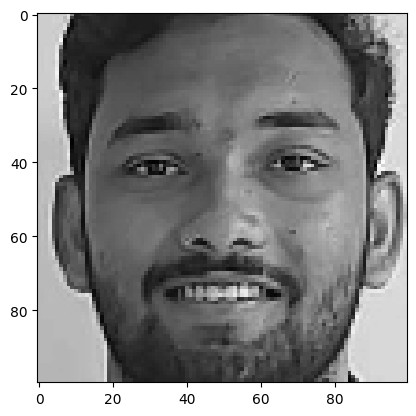

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[75],cmap='gray')
plt.show()

In [ ]:
import cv2

In [ ]:
def preprocessing(img):
  img=cv2.equalizeHist(img)
  img=img.reshape(100,100,1)
  img=img/255
  return img

In [ ]:
images=np.array(list(map(preprocessing,images)))
print("Shape of Input:",images.shape)

Shape of Input: (300, 100, 100, 1)


In [ ]:
#to categorical
from keras.utils import to_categorical
labels =to_categorical(labels)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Flatten,Conv2D,MaxPooling2D

In [ ]:
#MODEL TRAIN
def Lanet_model():
  model=Sequential()
  #Convolutional & ReLU layer
  model.add(Conv2D(35,(5,5),input_shape=(100,100,1),activation='relu'))
  #maxPooling Layer
  model.add(MaxPooling2D(pool_size=(2,2)))
  #Convolutional & ReLU layer
  model.add(Conv2D(15,(3,3),activation='relu'))
  #maxPooling Layer
  model.add(MaxPooling2D(pool_size=(2,2)))
  #Flatten/Input Layer
  model.add(Flatten())
  #Hidden Layer
  model.add(Dense(100,activation='relu'))
  #Output Layer
  model.add(Dense(p,activation='softmax'))
  model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model=Lanet_model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 96, 96, 35)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 35)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 15)     │         4,740 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7935)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       793,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 799,553 (3.05 MB)

 Trainable params: 799,553 (3.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(images,labels,validation_split=0.01,epochs=10)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 259ms/step - accuracy: 0.4085 - loss: 1.8820 - val_accuracy: 0.0000e+00 - val_loss: 0.9711
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6078 - loss: 0.9282 - val_accuracy: 0.6667 - val_loss: 0.6595
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7693 - loss: 0.6354 - val_accuracy: 0.6667 - val_loss: 0.5239
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9039 - loss: 0.2574 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9629 - loss: 0.0826 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9899 - loss: 0.0501 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9938 - loss: 0.0244 - val_accuracy: 1.0000 - val_loss: 9.1764e-04
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0091 - val_accuracy: 1

In [ ]:
model.save("final_model.h5")